In [1]:
%load_ext autoreload
%autoreload 2

from mortgage.computation import compute_mortgage
from mortgage.scenario import find_equal_burden_future_interest
from mortgage.scenario import plot_interest_scenarios

# Goal of this notebook

In this notebook you can compute and compare monthly fees and the total burden of different mortgages.
Also you can compare different scenario's with future interest rates.

## How to define your mortgage

To compute a mortgage you should give valid parameters.

You need to specify the fixed periods in months with corresponding interest rates for these periods.
Further you specify the amount and duration in months for the mortgage.

If the sum of the periods do not amount to the total duration, you get an error as follows:

In [2]:
compute_mortgage(periods=[240], interest_rates=[2.5, 3], mortgage_amount=300_000, mortgage_duration=360)

ERROR: mortgage not possible


Impossible mortgage: 0 euro
Total burden: 0 euro
Monthly fees:

An example of a correct mortgage:

In [3]:
mortgage_example = compute_mortgage(
    periods=[120, 240], 
    interest_rates=[2, 3], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='Example mortgage') 

mortgage_example

Example mortgage: 300,000 euro
Total burden: 424,815 euro
Monthly fees:
- 120 months: 1108 euro's
- 240 months: 1215 euro's

## Visualize your mortgage

You can plot your mortgage to visualize the monthly fees over the periods.

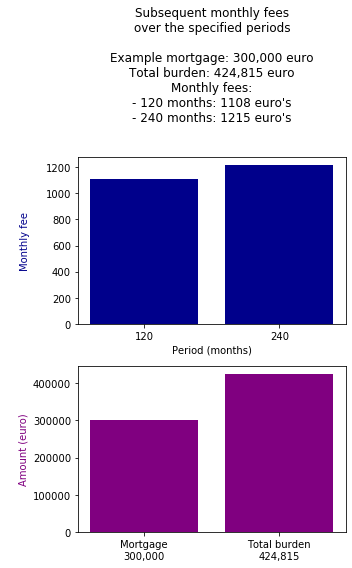

In [4]:
mortgage_example.plot();

For one mortgage this is not very useful, but it is nice to compare mortgages.

In [5]:
fixed_20_10 = compute_mortgage(
    periods=[240, 120], 
    interest_rates=[2, 3], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='20 + 10 years') 

fixed_30 = compute_mortgage(
    periods=[360], 
    interest_rates=[3.1], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='30 years') 

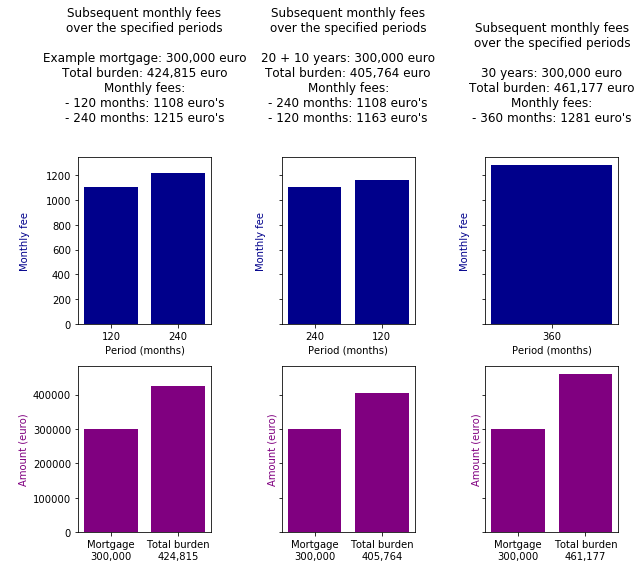

In [6]:
mortgage_example.compare([fixed_20_10, fixed_30]);

## Future interest scenario's

### How much can the interest rate grow?

Let's say you want to compare a mortgage with 30 years fixed interest with a mortgage of 20 years fixed and an unknow interest rate for the last 10 years. By how much can the interest rate increase to pay the same (burden) over the whole mortgage duration?

Let's find out!

In [7]:
# first we define the 30 years fixed mortgage
fixed_30 = compute_mortgage(
    periods=[360], 
    interest_rates=[2.85], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='30 years fixed') 
fixed_30

30 years fixed: 300,000 euro
Total burden: 446,641 euro
Monthly fees:
- 360 months: 1240 euro's

In [8]:
# then we define the periods and all but the last interest rates for the second mortgage
second_mortgage_periods = [240, 120]
second_mortgage_interest_rates = [2.55]

In [9]:
# finaly we compute the interest rate for which the two mortgages will have a similar total burden
find_equal_burden_future_interest(mortgage_a=fixed_30, 
                                  periods_b=second_mortgage_periods, 
                                  interest_rates_b=second_mortgage_interest_rates)

(4.950000000014189, Second mortgage: 300,000 euro
 Total burden: 446,701 euro
 Monthly fees:
 - 240 months: 1193 euro's
 - 120 months: 1336 euro's)

From the result you can see with what future interest rate you will finaly pay the same and how the monthly fees will be for the two scenario's.

In the example you see that with current interest rates (August 2019) the interest rate for the last 10 years fixed can grow to almost 5% (currently 1.85%) if you start with 20 years fixed interest compared to 30 years fixed.

### What is the effect of varying the interest rate on burden and fees?

To compare scenario's with diferent future interest rates we can define a mortgage and a minimum and maximum interest rate for the last fixed period in the mortgage.

The plot will show the increase in monthly fee and burden when increasing the future interest rate from the minimum to the maximum (comparing to the specified minimum interest rate).

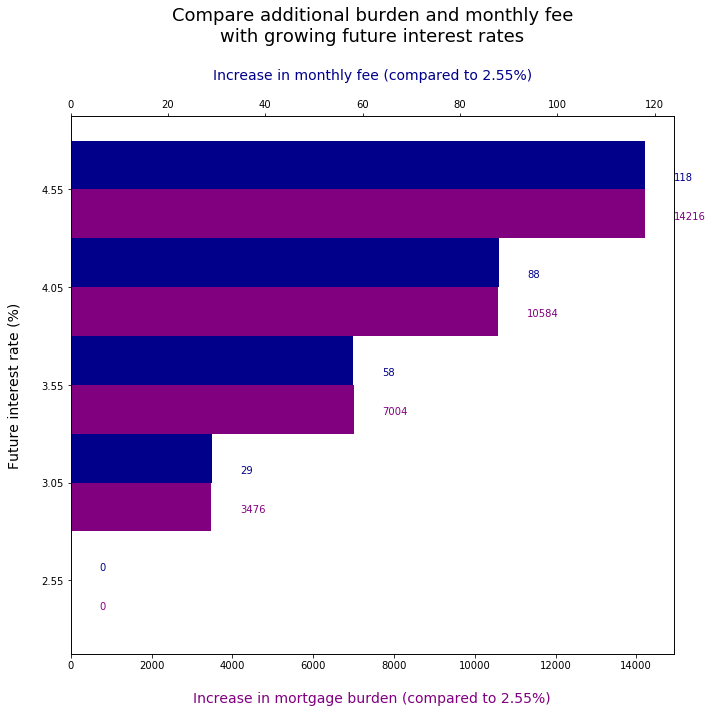

In [10]:
plot_interest_scenarios(
    periods=[240, 120],
    interest_rates=[2.55],
    future_interest_rate_min=2.55,
    future_interest_rate_max=5,
    mortgage_amount=300_000,
    mortgage_duration=360,
);

## Aditional features

You can also add mortgages which can be interesting when you want to split your mortgage in multiple part. E.g. one part 30 years fixed, one part 20 + 10 years and one part 10 + 10 + 10 years.

In [11]:
part1 = compute_mortgage(
    periods=[360], 
    interest_rates=[3], 
    mortgage_amount=100_000, 
    mortgage_duration=360,
    name='Part 1')

part2 = compute_mortgage(
    periods=[240, 120], 
    interest_rates=[3, 4], 
    mortgage_amount=100_000, 
    mortgage_duration=360,
    name='Part 2')

part3 = compute_mortgage(
    periods=[120, 120, 120], 
    interest_rates=[2, 3, 4], 
    mortgage_amount=100_000, 
    mortgage_duration=360,
    name='Part 3')

part1 + part2 + part3

Part 1 & Part 2 & Part 3: 300,000 euro
Total burden: 449,972 euro
Monthly fees:
- 120 months: 1211 euro's
- 120 months: 1247 euro's
- 120 months: 1287 euro's

Compare this to the whole mortgage for 30 years fixed.

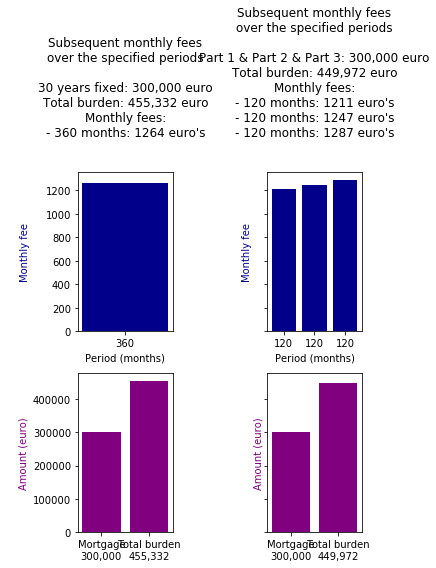

In [12]:
fixed30 = compute_mortgage(
    periods=[360], 
    interest_rates=[3], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='30 years fixed')

fixed30.compare([part1 + part2 + part3]);